## C1

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import stan
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm
from scipy import stats
from scipy.stats import pearsonr
import pickle
from psis import psisloo as ps

FONT_SIZE = 8

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
plt.rcParams['pdf.fonttype'] = 42

In [2]:
#%%
# load model fits and calculate PSIS-LOO

sm = pickle.load(open('model_1.pkl', 'rb'))
fit = pickle.load(open('fit_1.pkl', 'rb'))     
a = fit
log_lik = np.hstack((a['log_lik1'].T,a['log_lik2'].T,a['log_lik3'].T,a['log_lik4'].T))
looM1, loosM1, ksM1 = ps(log_lik)

In [3]:
sm = pickle.load(open('model_2.pkl', 'rb'))
fit = pickle.load(open('fit_2.pkl', 'rb')) 
a = fit
log_lik = np.hstack((a['log_lik1'].T,a['log_lik2'].T,a['log_lik3'].T,a['log_lik4'].T))
looM2, loosM2, ksM2 = ps(log_lik)

In [4]:
sm = pickle.load(open('model_3.pkl', 'rb'))
fit = pickle.load(open('fit_3.pkl', 'rb')) 
a = fit

chain_length = 1000
num_chains = 8

lik_chain = np.zeros(num_chains)
    
for chain in range(num_chains):
    lik_chain_curr = np.hstack((a['log_lik1'].T[chain*chain_length:chain*chain_length+chain_length],
                                a['log_lik2'].T[chain*chain_length:chain*chain_length+chain_length],
                                a['log_lik3'].T[chain*chain_length:chain*chain_length+chain_length],
                                a['log_lik4'].T[chain*chain_length:chain*chain_length+chain_length]))
    lik_chain[chain] = np.sum(np.mean(lik_chain_curr,axis=0))

In [5]:
best_chain = np.argmax(lik_chain)
    
log_lik = np.hstack((a['log_lik1'].T[best_chain*chain_length:best_chain*chain_length+chain_length],
                     a['log_lik2'].T[best_chain*chain_length:best_chain*chain_length+chain_length],
                     a['log_lik3'].T[best_chain*chain_length:best_chain*chain_length+chain_length],
                     a['log_lik4'].T[best_chain*chain_length:best_chain*chain_length+chain_length]))
looM3, loosM3, ksM3 = ps(log_lik)

In [6]:
sm = pickle.load(open('model_4.pkl', 'rb'))
fit = pickle.load(open('fit_4.pkl', 'rb')) 
a = fit
log_lik = np.hstack((a['log_lik1'].T,
                     a['log_lik2'].T,
                     a['log_lik3'].T,
                     a['log_lik4'].T))
looM4, loosM4, ksM4 = ps(log_lik)

/scratch/user/shipalnomoo/git/CircadianSMFISH/Code/psis.py:294: RuntimeWarning: overflow encountered in exp
  np.exp(temp, out=temp)


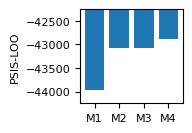

In [7]:
#%%
fig = plt.figure(figsize=(5/2.54,3.5/2.54))
plt.bar(range(4),[looM1,looM2,looM3,looM4],tick_label = ['M1','M2','M3','M4'])
plt.ylim([-44250,-42250])
plt.ylabel('PSIS-LOO')
plt.tight_layout()   

In [8]:
#%%
# load in required parameters from model M2 and model M4

sm = pickle.load(open('model_2.pkl', 'rb'))
fit = pickle.load(open('fit_2.pkl', 'rb')) 
    
a = fit

In [9]:
freq_scaleCry1 = a['freq_scaleCry1'].T.squeeze()
freq_scaleNr1d1 = a['freq_scaleNr1d1'].T.squeeze()
freq_scaleBmal1 = a['freq_scaleBmal1'].T.squeeze()
beta_Cry1 = a['beta_v_Cry1'].T.squeeze()
beta_Nr1d1 = a['beta_v_Nr1d1'].T.squeeze()
beta_Bmal1 = a['beta_v_Bmal1'].T.squeeze()

In [10]:
sm = pickle.load(open('model_4.pkl', 'rb'))
fit = pickle.load(open('fit_4.pkl', 'rb')) 
    
a = fit

In [11]:
burstalphaCry1 = a['burstCry1'].T.squeeze()
burstalphaNr1d1 = a['burstNr1d1'].T.squeeze()
burstalphaBmal1 = a['burstBmal1'].T.squeeze()
stdevCry1 = a['stdevCry1'].T.squeeze()
stdevNr1d1 = a['stdevNr1d1'].T.squeeze()
stdevBmal1 = a['stdevBmal1'].T.squeeze()
corrRC = a['corr_RC'].T[:,0,1]
corrBC = a['corr_BC'].T[:,0,1]

In [12]:
Nr1d1_params, Cry1_params, Bmal1_params = pickle.load(open('FourierParams.pkl', 'rb'))
#%%
# plot posterior parameter values

fig = plt.figure(figsize=(17.8/2.54,15/2.54))

xtest = np.linspace(17,42,100)

def func(x, A0, A1, A2, phi_1, phi_2):
    w = 2 * np.pi / 24 
    y = A0/2 + A1*np.cos(w*x-phi_1) + A2*np.cos(2*w*x-phi_2)
    return y.flatten()

def plot_burstfreq(xtest,Fourier_params,freq_scale):
    pred_lower = func(xtest, *Fourier_params)*np.percentile(freq_scale, 5)
    pred_median = func(xtest, *Fourier_params)*np.percentile(freq_scale, 50)
    pred_upper = func(xtest, *Fourier_params)*np.percentile(freq_scale, 95)
    return pred_lower, pred_median, pred_upper

<Figure size 700.787x590.551 with 0 Axes>

Text(0.5, 0, 'Time(hours)')

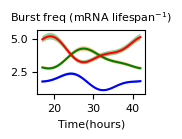

In [13]:
plt.subplot(5,4,5)
pred_lower, pred_median, pred_upper = plot_burstfreq(xtest,Nr1d1_params,freq_scaleNr1d1)
plt.plot(xtest, pred_median,color='b',label='Nr1d1')
plt.fill_between(xtest, pred_lower, pred_upper,alpha=0.5)

pred_lower, pred_median, pred_upper = plot_burstfreq(xtest,Cry1_params,freq_scaleCry1)
plt.plot(xtest, pred_median,color='g',label='Cry1')
plt.fill_between(xtest, pred_lower, pred_upper,alpha=0.5)

pred_lower, pred_median, pred_upper = plot_burstfreq(xtest,Bmal1_params,freq_scaleBmal1)
plt.plot(xtest, pred_median,color='r',label='Bmal1')
plt.fill_between(xtest, pred_lower, pred_upper,alpha=0.5)

plt.title(r'Burst freq (mRNA lifespan$^{-1}$)')
plt.xlabel('Time(hours)')

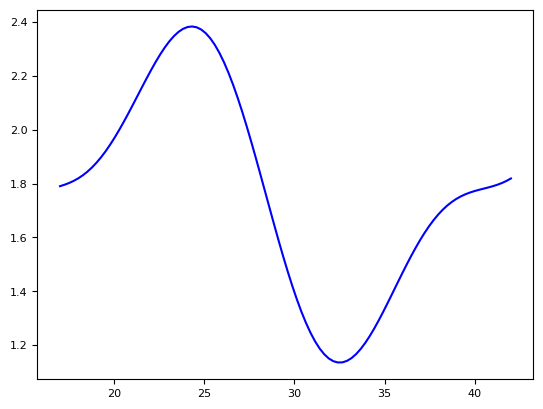

In [42]:
pred_lower, pred_median, pred_upper = plot_burstfreq(xtest,Nr1d1_params,freq_scaleNr1d1)
plt.plot(xtest, pred_median,color='b',label='Nr1d1')

In [46]:
_, Nr1d1_pred_median, _ = plot_burstfreq(xtest,Nr1d1_params,freq_scaleNr1d1)
_, Cry1_pred_median, _ = plot_burstfreq(xtest,Cry1_params,freq_scaleCry1)
_, Bmal1_pred_median, _ = plot_burstfreq(xtest,Bmal1_params,freq_scaleBmal1)

In [48]:
burst_freq_df = pd.DataFrame({'Nr1d1': Nr1d1_pred_median,
                             'Cry1': Cry1_pred_median,
                             'Bmal1': Bmal1_pred_median},
                             index=xtest)
burst_freq_df.head()

,Nr1d1,Cry1,Bmal1
17.000000,1.790081,2.854343,4.980522
17.252525,1.795484,2.835302,5.030050
17.505051,1.801932,2.818567,5.074988
17.757576,1.809728,2.804548,5.114625
18.010101,1.819145,2.793646,5.148295


In [49]:
burst_freq_df.to_csv('burst_freq.csv')

## C2

In [14]:
def plot_posterior(Nr1d1,Cry1,Bmal1,x_lower,x_upper,y_upper,i):
    
    plt.subplot(5,4,i)
    
    xx = np.linspace(x_lower, x_upper, 1000) 
    
    kde = stats.gaussian_kde(Nr1d1)
    plt.plot(xx, kde(xx)/sum(kde(xx)),color='b',label='Nr1d1')
    
    kde = stats.gaussian_kde(Cry1)
    plt.plot(xx, kde(xx)/sum(kde(xx)),color='g',label='Cry1')  

    kde = stats.gaussian_kde(Bmal1)
    plt.plot(xx, kde(xx)/sum(kde(xx)),color='r',label='Bmal1')
    
    plt.xlim((x_lower,x_upper))
    plt.ylim((0,y_upper))
    plt.yticks([])

In [15]:
def mean_burstsize(mu,std): return np.exp(mu+std**2/2)

In [16]:
burstalphaNr1d1.shape, stdevNr1d1.shape, 

((96000,), (96000,))

In [17]:
burstalphaCry1.shape, stdevCry1.shape

((96000,), (96000,))

In [18]:
burstalphaBmal1.shape, stdevBmal1.shape

((96000,), (96000,))

In [19]:
beta_Nr1d1.shape, beta_Cry1.shape, beta_Bmal1.shape

((96000,), (96000,), (96000,))

<Axes: >

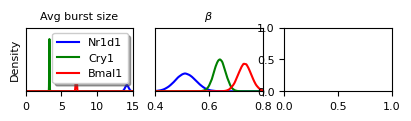

In [20]:
plot_posterior(mean_burstsize(burstalphaNr1d1,stdevNr1d1),
               mean_burstsize(burstalphaCry1,stdevCry1),
               mean_burstsize(burstalphaBmal1,stdevBmal1),
               0,15,0.25,6)
plt.title(r'Avg burst size')
plt.ylabel('Density')
legend = plt.legend(loc='upper right', shadow=True)

plot_posterior(beta_Nr1d1,beta_Cry1,beta_Bmal1,0.4,0.8,0.015,7)
plt.title(r'$\beta$')

plt.subplot(5,4,8)  

Text(0, 0.5, 'Density')

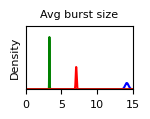

In [26]:
plot_posterior(mean_burstsize(burstalphaNr1d1,stdevNr1d1),
               mean_burstsize(burstalphaCry1,stdevCry1),
               mean_burstsize(burstalphaBmal1,stdevBmal1),
               0,15,0.25,6)
plt.title(r'Avg burst size')
plt.ylabel('Density')
# legend = plt.legend(loc='upper right', shadow=True)

In [54]:
burst_size_df = pd.DataFrame({'Nr1d1': mean_burstsize(burstalphaNr1d1,stdevNr1d1),
                              'Cry1': mean_burstsize(burstalphaCry1,stdevCry1),
                              'Bmal1': mean_burstsize(burstalphaBmal1,stdevBmal1)})
burst_size_df.head()

,Nr1d1,Cry1,Bmal1
0,14.093145,3.290477,6.954935
1,13.576567,3.326731,7.125061
2,13.468377,3.259950,7.075510
3,14.240990,3.322705,7.136895
4,14.128152,3.286206,7.127920


In [55]:
burst_size_df.to_csv('burst_size.csv')

Text(0.5, 1.0, '$\\rho$')

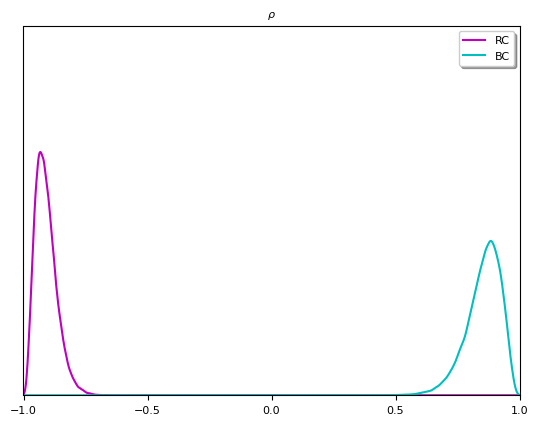

In [21]:
lower = -1
upper = 1

xx = np.linspace(lower, upper, 1000) 

kde = stats.gaussian_kde(corrRC)
plt.plot(xx, kde(xx)/sum(kde(xx)),color='m',label='RC')
kde = stats.gaussian_kde(corrBC)
plt.plot(xx, kde(xx)/sum(kde(xx)),color='c',label='BC')

legend = plt.legend(loc='upper right', shadow=True)

plt.ylim((0,0.03))
plt.yticks([])

plt.xlim((lower,upper))
plt.xticks(np.linspace(lower, upper, 5))

plt.title(r'$\rho$')

## D

In [22]:
#plt.tight_layout()
#%%
# load smFISH data

dat_RC = pd.read_csv('smFISH_RC.csv')

jtime_RC = dat_RC['Time'].values
AreaNormed_RC = dat_RC['AreaNormed'].values
CountsNr1d1_RC = dat_RC['Counts Nr1d1'].values
CountsCry1_RC = dat_RC['Counts Cry1'].values

dat_BC = pd.read_csv('smFISH_BC.csv')

jtime_BC = dat_BC['Time'].values
AreaNormed_BC = dat_BC['AreaNormed'].values
CountsBmal1_BC = dat_BC['Counts Bmal1'].values
CountsCry1_BC = dat_BC['Counts Cry1'].values

CountsCry1TOT = np.concatenate((CountsCry1_BC,CountsCry1_RC))
jtime_Cry1TOT = np.concatenate((jtime_BC,jtime_RC))

w = 2 * np.pi / 24 

In [23]:
# load in required parameters from model M2 and model M4
sm = pickle.load(open('model_2.pkl', 'rb'))
fit = pickle.load(open('fit_2.pkl', 'rb')) 
    
a = fit

In [24]:
a['freq_scaleCry1'].shape, a['freq_scaleNr1d1'].shape, a['freq_scaleBmal1'].shape, a['beta_v_Cry1'].shape, a['beta_v_Nr1d1'].shape, a['beta_v_Bmal1'].shape 

((1, 96000), (1, 96000), (1, 96000), (1, 96000), (1, 96000), (1, 96000))

In [27]:
freq_scaleCry1 = np.mean(a['freq_scaleCry1'].T,axis=1).squeeze()
freq_scaleNr1d1 = np.mean(a['freq_scaleNr1d1'].T,axis=1).squeeze()
freq_scaleBmal1 = np.mean(a['freq_scaleBmal1'].T,axis=1).squeeze()
beta_Cry1 = np.mean(a['beta_v_Cry1'].T,axis=1).squeeze()
beta_Nr1d1 = np.mean(a['beta_v_Nr1d1'].T,axis=1).squeeze()
beta_Bmal1 = np.mean(a['beta_v_Bmal1'].T,axis=1).squeeze()

In [28]:
sm = pickle.load(open('model_4.pkl', 'rb'))
fit = pickle.load(open('fit_4.pkl', 'rb')) 
    
a = fit

In [29]:
a['mu_vec_RC'].shape, a['cov_RC'].shape, a['mu_vec_BC'].shape, a['cov_BC'].shape

((2, 96000), (2, 2, 96000), (2, 96000), (2, 2, 96000))

In [34]:
mu_RC = np.mean(a['mu_vec_RC'].T,axis=1).squeeze()
Cov_RC = np.mean(a['cov_RC'].T,axis=0).squeeze()

mu_BC = np.mean(a['mu_vec_BC'].T,axis=1).squeeze()
Cov_BC = np.mean(a['cov_BC'].T,axis=0).squeeze()

Nr1d1_params, Cry1_params, Bmal1_params = pickle.load(open('FourierParams.pkl', 'rb'))
#%%

In [41]:
mu_RC.shape, Cov_RC.shape

((96000,), (2, 2))

In [ ]:
def kde_sims(params_x,params_y,freq_scale_x,freq_scale_y,beta_x,beta_y,mu,Cov,area,time_vec):
    
    time_vec = np.array([21,33])

    x1_vec = range(100)
    x2_vec = range(100)

    its = 15
    
    kde_sims = np.zeros((len(x1_vec),len(x2_vec),len(time_vec)))
    
    y1 = np.zeros(its*len(area))
    y2 = np.zeros(its*len(area))
    
    area_sims = np.repeat(area, its, axis=None)

    for k, time_curr in enumerate(time_vec):
        for n in range(len(area_sims)):
            eta = np.random.multivariate_normal(mu,Cov)
            r1 = freq_scale_x*(params_x[0]/2+params_x[1]*np.cos(time_curr*w-params_x[3])+params_x[2]*np.cos(2*time_curr*w-params_x[4]));
            r2 = freq_scale_y*(params_y[0]/2+params_y[1]*np.cos(time_curr*w-params_y[3])+params_y[2]*np.cos(2*time_curr*w-params_y[4]));
            b1 = np.exp(beta_x*np.log(area_sims[n])+eta[0]);
            b2 = np.exp(beta_y*np.log(area_sims[n])+eta[1]);
            m1 = b1*r1
            m2 = b2*r2
            p1 = r1/(m1+r1)
            p2 = r2/(m2+r2)
            y1[n] = np.random.negative_binomial(r1, p1)
            y2[n] = np.random.negative_binomial(r2, p2)
        
        kde = stats.gaussian_kde(np.vstack((y1,y2)),bw_method='silverman')
        for i, x1_curr in enumerate(x1_vec):
            print(i)
            for j, x2_curr in enumerate(x2_vec):
                val = np.array([[x1_curr],[x2_curr]])
                kde_sims[j,i,k] = kde(val)
    return kde_sims            

In [38]:
time_vec = np.array([21,33])
kde_sims_BC = kde_sims(Cry1_params,Bmal1_params,freq_scaleCry1,freq_scaleBmal1,beta_Cry1,beta_Bmal1,mu_BC,Cov_BC,AreaNormed_BC,time_vec)
kde_sims_RC = kde_sims(Cry1_params,Nr1d1_params,freq_scaleCry1,freq_scaleNr1d1,beta_Cry1,beta_Nr1d1,mu_RC,Cov_RC,AreaNormed_RC,time_vec)
         

ValueError: mean and cov must have same length

In [ ]:
#%%
def kde_empirical(Counts_x,Counts_y,jtime,time_vec):
    
    x1_vec = range(100)
    x2_vec = range(100)
    
    kde_dat = np.zeros((len(x1_vec),len(x2_vec),len(time_vec)))

    for k in range(len(time_vec)):
        x = (Counts_x[jtime==time_vec[k]]).reshape(1,-1)
        y = (Counts_y[jtime==time_vec[k]]).reshape(1,-1)
        kde = stats.gaussian_kde(np.concatenate((x,y),axis=0))
        for i, x1_curr in enumerate(x1_vec):
            print(i)
            for j, x2_curr in enumerate(x2_vec):
                val = np.array([[x1_curr],[x2_curr]])
                kde_dat[j,i,k] = kde(val)
    return kde_dat

In [ ]:
kde_dat_BC = kde_empirical(CountsBmal1_BC,CountsCry1_BC,jtime_BC,time_vec) 
kde_dat_RC = kde_empirical(CountsNr1d1_RC,CountsCry1_RC,jtime_RC,time_vec)               
                
#%%
#fig = plt.figure(figsize=(3*len(time_vec),3))
for z in range(len(time_vec)):
    plt.subplot(5,4,4*z+13)   
    plt.contour((kde_dat_BC[:,:,z]),cmap = 'jet',levels = 10)        
    plt.ylabel('Cry1 mRNA')
    if z == 0:
        plt.title('Data') 
    if z != 1:
        plt.gca().axes.xaxis.set_ticklabels([])
    if z ==1:
        plt.xlabel('Bmal1 mRNA') 
    plt.ylim([0, 40])
    plt.xticks(np.arange(0, 101, step=25))

for z in range(len(time_vec)):
    plt.subplot(5,4,4*z+14)   
    plt.contour(np.transpose(kde_sims_BC[:,:,z]),cmap = 'jet',levels = 10)        
    if z == 0:
        plt.title('Model') 
    if z != 1:
        plt.gca().axes.xaxis.set_ticklabels([])
    plt.gca().axes.yaxis.set_ticklabels([])
    if z == 1:
        plt.xlabel('Bmal1 mRNA') 
    plt.ylim([0, 40])
    plt.xticks(np.arange(0, 101, step=25))       
    
    
for z in range(len(time_vec)):
    plt.subplot(5,4,4*z+15)   
    plt.contour((kde_dat_RC[:,:,z]),cmap = 'jet',levels = 10)        
    plt.ylabel('Cry1 mRNA')
    if z == 0:
        plt.title('Data') 
    if z != 1:
        plt.gca().axes.xaxis.set_ticklabels([])
    plt.gca().axes.yaxis.set_ticklabels([])
    if z == 1:
        plt.xlabel('Nr1d1 mRNA') 
    plt.ylim([0, 40])
    plt.xticks(np.arange(0, 101, step=25))

for z in range(len(time_vec)):
    plt.subplot(5,4,4*z+16)   
    plt.contour(np.transpose(kde_sims_RC[:,:,z]),cmap = 'jet',levels = 10)        
    if z == 0:
        plt.title('Model') 
    if z != 1:
        plt.gca().axes.xaxis.set_ticklabels([])
    plt.gca().axes.yaxis.set_ticklabels([])
    if z ==1:
        plt.xlabel('Nr1d1 mRNA') 
    plt.ylim([0, 40])
    plt.xticks(np.arange(0, 101, step=25))    
    
    
plt.tight_layout()    